In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
n_classes = 3

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re

In [5]:
df = pd.read_csv("../../1k_sample_labelled_india.csv")
df

,index,Text,pos_tagged_words,new_languages,words_list,new_text,scores,compound,sentiment_vader
0,57000,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"['become', 'anti', 'vaccine', 'blame', 'malays...",become anti vaccine blame malaysian government...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.3182,negative
1,57003,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"['van', 'passports', 'anti', 'vaccine', 'prote...",van passports anti vaccine protester gather sp...,"{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp...",-0.4767,negative
2,57010,"good, sir also make sure that other persons yo...","[('good', 'JJ'), ('sir', 'NN'), ('also', 'RB')...",ENGLISH,"['good', 'sir', 'also', 'make_sure', 'person',...",good sir also make_sure person fraternity part...,"{'neg': 0.084, 'neu': 0.727, 'pos': 0.189, 'co...",0.4404,positive
3,57014,some anti-vaxers my circle influence believe t...,"[('some', 'DT'), ('anti', 'JJ'), ('cars', 'NNS...",ENGLISH,"['anti', 'cars', 'circle', 'influence', 'belie...",anti cars circle influence believe second wave...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,57044,"myself, my lovely wife &amp; respectful parent...","[('myself', 'PRP'), ('my', 'PRP$'), ('lovely',...",ENGLISH,"['lovely', 'wife', 'amp', 'respectful', 'paren...",lovely wife amp respectful parent complete tak...,"{'neg': 0.075, 'neu': 0.424, 'pos': 0.501, 'co...",0.9801,positive
...,...,...,...,...,...,...,...,...,...
994,75434,amazing staff &amp; supporting .thanks all got...,"[('amazing', 'JJ'), ('staff', 'NN'), ('amp', '...",ENGLISH,"['amazing', 'staff', 'amp', 'support', 'thank'...",amazing staff amp support thank get vaccinate ...,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...",0.8625,positive
995,75444,it has been great honor &amp; pleasure have va...,"[('it', 'PRP'), ('has', 'VBZ'), ('been', 'VBN'...",ENGLISH,"['great', 'honor', 'amp', 'pleasure', 'vaccina...",great honor amp pleasure vaccinated people kin...,"{'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'comp...",0.9001,positive
996,75691,"great know, i am now fully #vaccinated with 2n...","[('great', 'JJ'), ('know', 'VBP'), ('i', 'JJ')...",ENGLISH,"['great', 'know', 'fully', 'vaccinate', 'dose'...",great know fully vaccinate dose also heartfelt...,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.8885,positive
997,75783,thank you #republic_of_india i have vaccinated...,"[('thank', 'IN'), ('you', 'PRP'), ('i', 'VBP')...",ENGLISH,"['thank', 'vaccinated', 'today', 'public', 'th...",thank vaccinated today public thank article th...,"{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...",0.8885,positive


In [6]:
# Drop columns not used for modelling
cols_to_drop = ['index', 'Text', 'pos_tagged_words','new_languages','words_list', 'scores','compound']
df.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
df

,new_text,sentiment_vader
0,become anti vaccine blame malaysian government...,negative
1,van passports anti vaccine protester gather sp...,negative
2,good sir also make_sure person fraternity part...,positive
3,anti cars circle influence believe second wave...,neutral
4,lovely wife amp respectful parent complete tak...,positive
...,...,...
994,amazing staff amp support thank get vaccinate ...,positive
995,great honor amp pleasure vaccinated people kin...,positive
996,great know fully vaccinate dose also heartfelt...,positive
997,thank vaccinated today public thank article th...,positive


In [8]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = df.sentiment_vader.apply(sentiment2target)

In [9]:
df['sentiment'] =targets

In [10]:
df['sentiment'].value_counts()

1    401
2    303
0    295
Name: sentiment, dtype: int64

In [11]:
df.drop(['sentiment_vader'], axis = 1, inplace = True)
df

,new_text,sentiment
0,become anti vaccine blame malaysian government...,0
1,van passports anti vaccine protester gather sp...,0
2,good sir also make_sure person fraternity part...,2
3,anti cars circle influence believe second wave...,1
4,lovely wife amp respectful parent complete tak...,2
...,...,...
994,amazing staff amp support thank get vaccinate ...,2
995,great honor amp pleasure vaccinated people kin...,2
996,great know fully vaccinate dose also heartfelt...,2
997,thank vaccinated today public thank article th...,2


In [12]:
X = df
y = X['sentiment']
X.drop(['sentiment'], axis=1, inplace=True)

# Split the data using stratify 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

# Reset the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_test_stats = X_test.copy()

In [13]:
# Convert the text feature into a vectors of tokens
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',
                             lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train.new_text)
X_test_cv = cv.transform(X_test.new_text)


In [14]:
import scipy.sparse as sp
train_count = sp.csr_matrix(X_train_cv)

In [15]:
X_train = sp.hstack([train_count])

In [16]:
X_train

<749x2364 sparse matrix of type '<class 'numpy.int64'>'
	with 7485 stored elements in Compressed Sparse Row format>

In [17]:
test_count = sp.csr_matrix(X_test_cv)
X_test = sp.hstack([test_count])

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
n_classes = 3

clf = SGDClassifier(alpha=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [20]:
# Plot scores and make a confusion matrix for non-xenophobic/xenophobic predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
n_classes = 3

cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))

print("Accuracy score ={:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred, average="macro")*100))
print(f'Number of samples to classify: {len(X_test.toarray())}\n')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print(f'Confusion matrix: \n{cm}')

Accuracy score =80.00%
F1 score =78.69%
Number of samples to classify: 250

Accuracy score: 0.8
Precision Score :  0.8
F1 Score :  0.8000000000000002
Recall Score :  0.8
Confusion matrix: 
[[48 20  6]
 [ 1 98  1]
 [11 11 54]]


Text(38.32000000000001, 0.5, 'True label')

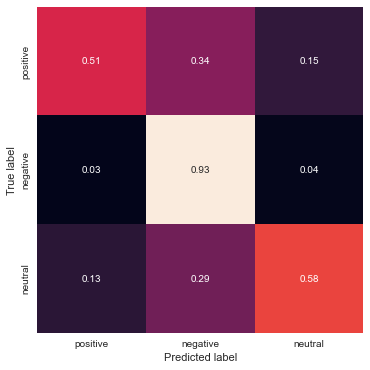

In [49]:
# Normalize the confusion matrix and plot it

labels = ['positive', 'negative', 'neutral']
plt.figure(figsize=(6,6))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, square=True, annot=True, cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [50]:
# Show how the first 50 test tweets were classified and their true label
testing_predictions = []
for i in range(len(X_test.toarray())):
    if y_pred[i] == 0:
        testing_predictions.append('Negative') 
    else:
        if y_pred[i] == 1:
            testing_predictions.append('Neutral')
        else:
            testing_predictions.append('Positive')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'text':list(X_test_stats.new_text)})
check_df.replace(to_replace=0, value='Negative', inplace=True)
check_df.replace(to_replace=1, value='Neutral', inplace=True)
check_df.replace(to_replace=2, value='Positive', inplace=True)
check_df.iloc[:50]


,actual_label,prediction,text
0,Positive,Positive,feel happy family fully
1,Neutral,Neutral,pfizer expect brief u official come day need b...
2,Neutral,Neutral,people recover couid nineteen could immunity l...
3,Negative,Positive,zombie infected infection cause murder history...
4,Positive,Positive,fully vaccinate couid nineteen continue maskup...
5,Positive,Positive,thank goodness level head people everywhere us...
6,Negative,Positive,problem sinovac not ineffective effective savi...
7,Positive,Positive,respect is first priority
8,Negative,Neutral,sir every one not vaccinate till today mostly ...
9,Neutral,Neutral,can not many vaccinated people go shopping cen...
